In [ ]:
#Background and non Reflective Voltages for later data correction and cleaning

import numpy as np
from pydaqmx_helper.adc import ADC
myADC = ADC()

myADC.addChannels([0],
                  ADC_mode="DAQmx_Val_Diff",
                  minRange=-6.0,
                  maxRange=6.0)

samples = myADC.sampleVoltages(100,100)

print(samples[0])

np.savetxt("BackgroundVoltages.txt", samples[0])


In [ ]:
#Spliting Motor and Sensor testing for the moment
from pydaqmx_helper.digital_io import Digital_IO
from time import sleep

#For this experiment we're using P0.0 to P0.4
myDigital_IO = Digital_IO('0','output')

#Development of the Measurement Cycle

#Could be more efficiant with a universal no but for initial testing I wanted to be able to read it very easily
MotorOn = 0b00000001
MotorOFF = 0b00000000

Clockwise = 0b00000010
AntiClockwise = 0b00000000

Motor1High = 0b00001000
Motor1Low = 0b00000000

Motor2High = 0b00010000
Motor2Low = 0b00000000

def AdjustmentMovements(Cycles, Direction, WhichMotors):
    #Calibrating to Movements
    while(Cycles > 0):
        
        if(WhichMotors == "Both"):
            #Both move
            myDigital_IO.write(MotorOn | Direction | Motor1High | Motor2High)
            sleep(0.1)
            myDigital_IO.write(MotorOn | Direction | Motor1Low | Motor2Low)
        
            #Just the sensor moves due to lower angular speed approx 2:1 Prism:Detector
            myDigital_IO.write(MotorOn | Direction | Motor1High | Motor2Low)
            sleep(0.1)
            myDigital_IO.write(MotorOn | Direction | Motor1Low | Motor2Low)
            
            #Countdown for reasearcher
            print(Cycles)
            Cycles = Cycles-1
            
            
            
        elif(WhichMotors = "Prism"):
            #Here Just Motor two moves, (prism movements 100 cycles = 8 degrees approx)
            myDigital_IO.write(MotorOn | Direction | Motor1Low | Motor2High)
            sleep(0.1)
            myDigital_IO.write(MotorOn | Direction | Motor1Low | Motor2Low)
            
            #Countdown for reasearcher
            print(Cycles)
            Cycles = Cycles-1
            
            
            
        elif(WhichMotors = "Sensor"):
            #Here Just Motor one moves, (detector movements 100 cycles = 4 degrees approx)
            myDigital_IO.write(MotorOn | Direction | Motor1High | Motor2Low)
            sleep(0.1)
            myDigital_IO.write(MotorOn | Direction | Motor1Low | Motor2Low)
            
            #Countdown for reasearcher
            print(Cycles)
            Cycles = Cycles-1
        

AdjustmentMovements(100, AntiClockwise, Both)
    

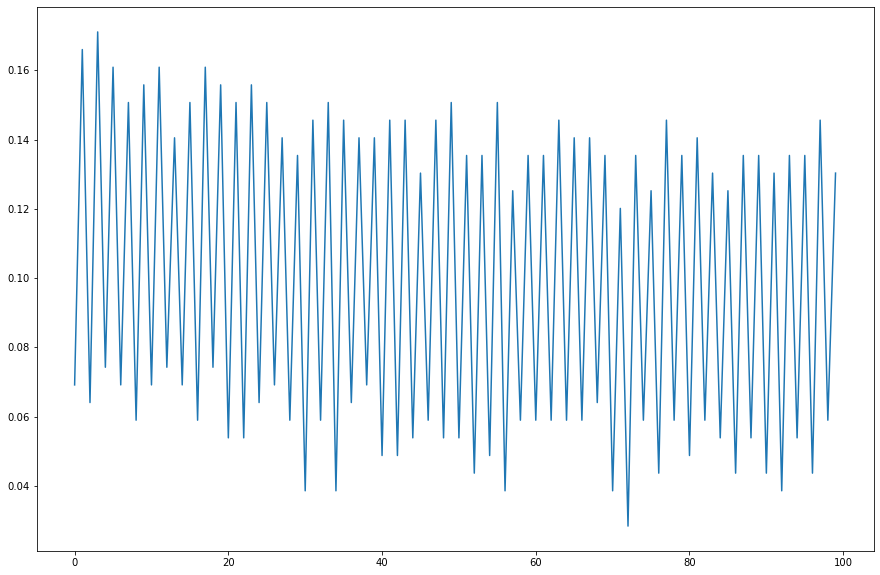

In [1]:
#Displaying Background Voltages

import matplotlib.pyplot as plt
import numpy as np

Voltages = np.loadtxt("BackgroundLightVoltages.txt")

i = 0
Measurement = np.array([])
while(i < len(Voltages)):
    Measurement = np.append(Measurement, i)
    
    i = i + 1


plt.figure(figsize = (15,10))    
plt.plot(Measurement, Voltages)

#print(Voltages)

4.920483287499572
0.004046621034231302


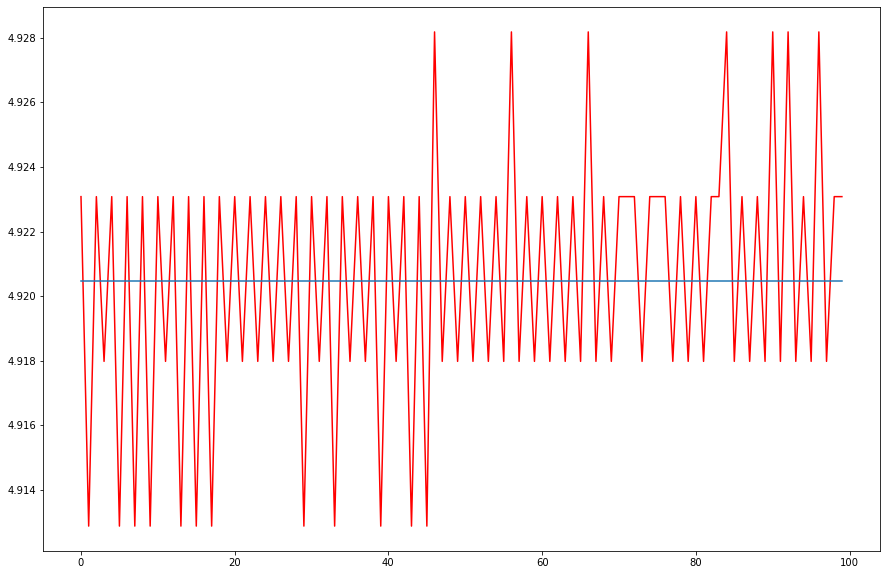

In [2]:
#Visualising and dispaying the varience in the direct measurements of the red laser

import matplotlib.pyplot as plt
import numpy as np

VoltagesRedLaser = np.loadtxt("RedLaserNoReflection.txt")

i = 0
Measurement = np.array([])
while(i < len(VoltagesRedLaser)):
    Measurement = np.append(Measurement, i)
    
    i = i + 1


plt.figure(figsize = (15,10))    
plt.plot(Measurement, VoltagesRedLaser, color="red")

Average = np.mean(VoltagesRedLaser)

plt.plot(Measurement, Average*(np.ones(100)))
print(Average)

RedLaserStandardDeviations = np.std(VoltagesRedLaser)
print(RedLaserStandardDeviations)

2.57790029274907
0.029208915510781707


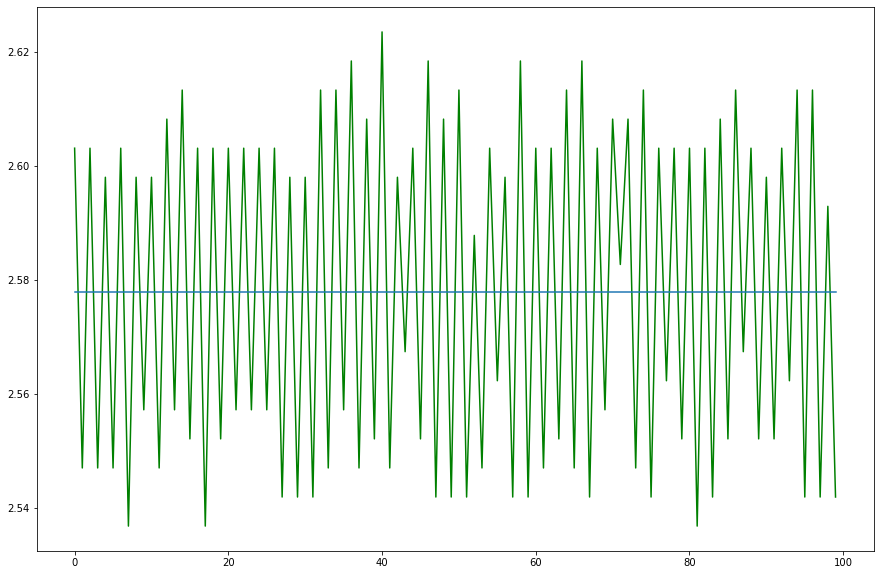

In [3]:
#Visualising and dispaying the varience in the direct measurements of the green laser

import matplotlib.pyplot as plt
import numpy as np

VoltagesGreenLaser = np.loadtxt("GreenLaserNoReflection.txt")

i = 0
Measurement = np.array([])
while(i < len(VoltagesGreenLaser)):
    Measurement = np.append(Measurement, i)
    
    i = i + 1


plt.figure(figsize = (15,10))    
plt.plot(Measurement, VoltagesGreenLaser, color="green")

Average = np.mean(VoltagesGreenLaser)

plt.plot(Measurement, Average*(np.ones(100)))
print(Average)


GreenLaserStandardDeviations = np.std(VoltagesGreenLaser)
print(GreenLaserStandardDeviations)

3.514933490649271
0.01122587285014617


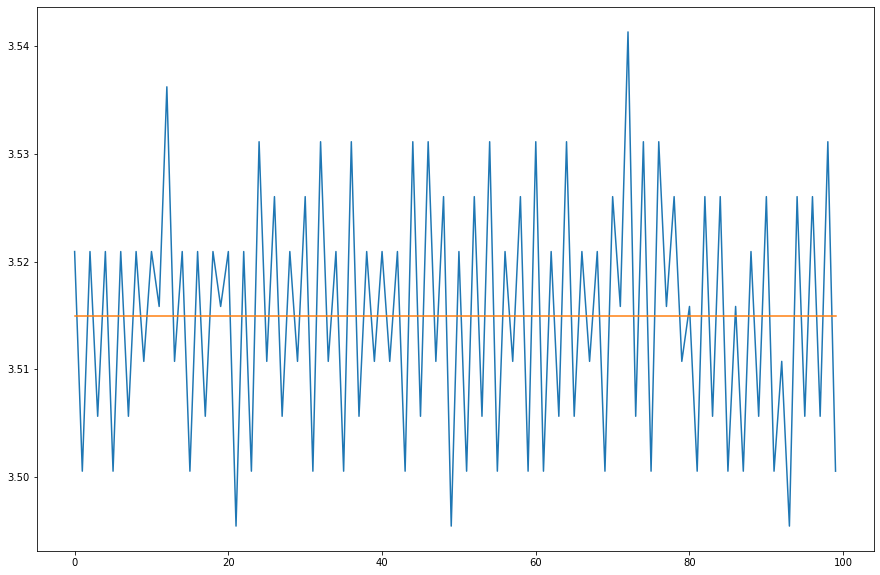

In [4]:
#Visualising and dispaying the varience in the direct measurements of the blue laser

import matplotlib.pyplot as plt
import numpy as np

VoltagesBlueLaser = np.loadtxt("BlueLaserNoReflection.txt")

i = 0
Measurement = np.array([])
while(i < len(VoltagesBlueLaser)):
    Measurement = np.append(Measurement, i)
    
    i = i + 1


plt.figure(figsize = (15,10))    
plt.plot(Measurement, VoltagesBlueLaser)

Average = np.mean(VoltagesBlueLaser)

plt.plot(Measurement, Average*(np.ones(100)))
print(Average)
BlueLaserStandardDeviations = np.std(VoltagesBlueLaser)
print(BlueLaserStandardDeviations)

In [5]:
#Full Measurement Module, can be ran on it's own and reset using the funciton in the above module

#Imports
import numpy as np
from pydaqmx_helper.digital_io import Digital_IO
from time import sleep
from pydaqmx_helper.adc import ADC
import matplotlib.pyplot as plt


#Initialising ADC for the sampling
myADC = ADC()

myADC.addChannels([0],
                  ADC_mode="DAQmx_Val_Diff",
                  minRange=-6.0,
                  maxRange=6.0) #Max value seen with laser is 5 lowest is -3



#Setting up DAC for the motor
myDigital_IO = Digital_IO('0','output')

#Naming our binary variables for ease of reading
MotorOn = 0b00000001
MotorOFF = 0b00000000

Clockwise = 0b00000010
AntiClockwise = 0b00000000

Motor1High = 0b00001000
Motor1Low = 0b00000000

Motor2High = 0b00010000
Motor2Low = 0b00000000



#Array used to manipulate the data
VoltageDifferences = np.array([])



#Measurement function can decide how many pulses and direction
def MeasurementCycle(Cycles, Direction):
    #Calibrating to Movements
    VoltageDifferences = np.array([])
    while(Cycles > 0):
        #Both motors move, moving the prism and the sensor
        myDigital_IO.write(MotorOn | Direction | Motor1High | Motor2High)
        sleep(0.15)
        myDigital_IO.write(MotorOn | Direction | Motor1Low | Motor2Low)
        
        #Sampling the light
        samples = myADC.sampleVoltages(10,100)
        MeanVoltageP0 = np.mean(samples[0])
        VoltageDifferences = np.append(VoltageDifferences, MeanVoltageP0)
        
        #Just the sensor moves due to lower angular speed so that the laser remains in a fixed position on the sensor
        myDigital_IO.write(MotorOn | Direction | Motor1High | Motor2Low)
        sleep(0.15)
        myDigital_IO.write(MotorOn | Direction | Motor1Low | Motor2Low)
        
        Cycles = Cycles-1
        
    return VoltageDifferences
        
        
#Measurement Function executes the measurements then outputs voltage differences into the variable below
Output = MeasurementCycle(100, Clockwise)


#Display the gathered array    
print(Output)


#Saving Voltages Read to txt file
np.savetxt("RedLaserData.txt", Output)


#Plot the data for ease
# i = 1 as first movement done before first measurement
i = 1 


#Here I was manually changing what I ended up transofrming into the MeasuredAngles funciton
OLDMeasuredAngles = np.array([])

while(i < (len(Output) +1)):
    angle = 45 - (8/100)*i
    MeasuredAngles = np.append(OLDMeasuredAngles, angle)
    i = i + 1
    
plt.plot(OLDMeasuredAngles, Output, 'o', color='black');

ModuleNotFoundError: No module named 'pydaqmx_helper'

In [6]:
#Functions used for Data Visualisation and Analysis
import numpy as np
import matplotlib.pyplot as plt



#Building a Functions for Angles
def MeasuredAngles(NoDataPoints, StartingAngle, Direction):
    i = 0
    StoredAngles = np.array([])
    
    #Movement taken before first datapoint recorded
    while(i < NoDataPoints):
        angle = StartingAngle + (Direction)*(8/100)*i    # Here we take negative as we started at 45 and turned clockwise: 
                                                         #therefore angle decreased
        StoredAngles = np.append(StoredAngles, angle)
        i = i + 1
          
    return(StoredAngles)

#Directions and Angle change signs
ClockwiseMeasurements = (-1) #decreasing angles
AntiClockwiseMeasurements = 1 #increasing angles



#Direct Laser Voltages 

RedNoReflection = np.loadtxt("RedLaserNoReflection.txt")

GreenNoReflection = np.loadtxt("GreenLaserNoReflection.txt")

BlueNoReflection = np.loadtxt("BlueLaserNoReflection.txt")

RedLaserVoltages = np.loadtxt("RedLaser29th.txt")

GreenLaserVoltages = np.loadtxt("GreenLaser29th.txt")

BlueLaserVoltages = np.loadtxt("BlueLaser29th.txt")



#Relative Reflectivity Function 
def RelativeReflectivity(Data, Colour):

    i = 0 
    StoredRelativeValues = np.array([]) 
    
    #Colour Selection
    if(Colour == "Red"):
        ReferencePoint = np.mean(RedNoReflection)
        
    elif(Colour == "Green"):
        ReferencePoint = np.mean(GreenNoReflection)
        
    elif(Colour == "Blue"):
        ReferencePoint = np.mean(BlueNoReflection)
        
    elif(Colour == "Relative To Reflection Max"):
        ReferencePoint = np.max(Data)
        
    elif(Colour == "Errors Red"):
        ReferencePoint = np.max(RedLaserVoltages)
        
    elif(Colour == "Errors Green"):
        ReferencePoint = np.max(GreenLaserVoltages)
        
    elif(Colour == "Errors Blue"):
        ReferencePoint = np.max(BlueLaserVoltages)

    while(i < len(Data)):
        
        RelativeValue = (Data[i])/ReferencePoint
        StoredRelativeValues = np.append(StoredRelativeValues, RelativeValue)
        i = i + 1
        
    return(StoredRelativeValues)



#Function for finding Angles of Resonance
def ResonanceAngle(ReflectivityValues, CorrespondingAngles):
    
    
    LowestRelativeReflectivity = np.where(ReflectivityValues == min(ReflectivityValues))
    
    
    AngleOfResonance = CorrespondingAngles[LowestRelativeReflectivity]
    MinimumReflectivity = min(ReflectivityValues)
    
    return(AngleOfResonance, MinimumReflectivity)



#Calculation of the Internal Angle
def InternalAngles(ArrayOfAngles):
    i = 0
    ArrayOfInternalAngles = np.array([])
    IndexGlass = 1.52
    
    while(i<len(ArrayOfAngles)):
        AngleInRads = ((ArrayOfAngles[i])*2*np.pi)/360
        
        InternalAngle = np.arcsin(IndexGlass*(np.sin(AngleInRads - (np.pi/4)))) + (np.pi/4)
                                  
        ArrayOfInternalAngles = np.append(ArrayOfInternalAngles, InternalAngle)
        
        i = i + 1
    
    return((ArrayOfInternalAngles*360)/(2*np.pi))



#Half Maximum Width of Resonance Function
def HalfMaximumWidth(ArrayOfAngles, Voltages, Colour):
    i = 0
    AnglesLessThanHalfMax = np.array([])
    RelReflect = RelativeReflectivity(Voltages, Colour)
    HalfMinPoint = (max(RelReflect) - min(RelReflect))/2 + min(RelReflect)
    
    while(i < len(RelReflect)):
        if(RelReflect[i] <= HalfMinPoint):
            AnglesLessThanHalfMax = np.append(AnglesLessThanHalfMax, ArrayOfAngles[i])
            
        i=i+1
    
    return(max(AnglesLessThanHalfMax) , min(AnglesLessThanHalfMax), HalfMinPoint)

#Experimental Gold Dielectric Function dependent on the Angle of Resonance
def GoldDielectricFunction(AoR):
    IndexGlass = 1.52
    RadiansAoR = (AoR/360)*2*np.pi
    
    DielectricFunction = (((np.sin(RadiansAoR))*IndexGlass)**2)/(1 - ((np.sin(RadiansAoR))*IndexGlass)**2)
    
    return(DielectricFunction)

#Error on the experimental gold dielectric function, derivation in report
def DielectricFunctionError(AoR, AngleError):
    RadiansAoR = (AoR/180)*(np.pi)
    IndexGlass = 1.52
    
    DerivativeOfDielectricFunction = (2*(IndexGlass**2)*np.sin(RadiansAoR)*np.cos(RadiansAoR))/((1-(IndexGlass*np.sin(RadiansAoR))**2)**2)
    
    return(DerivativeOfDielectricFunction*AngleError)
    
    
        

For Gold film and Red laser we have a resonance angle of  [39.40133974]
The Half Maximum Width is =  0.9754542649852027
The Relative Error on the Red Laser Voltages is  0.00026006671597130637
The minimum relative reflectivity to a non-reflected red laser is  0.5792043278342905
The dielectric function for gold at wavelength 632.8nm is  [13.46622649]
The calculated error on the dielectric function at 632.8nm is  [23.71487696]




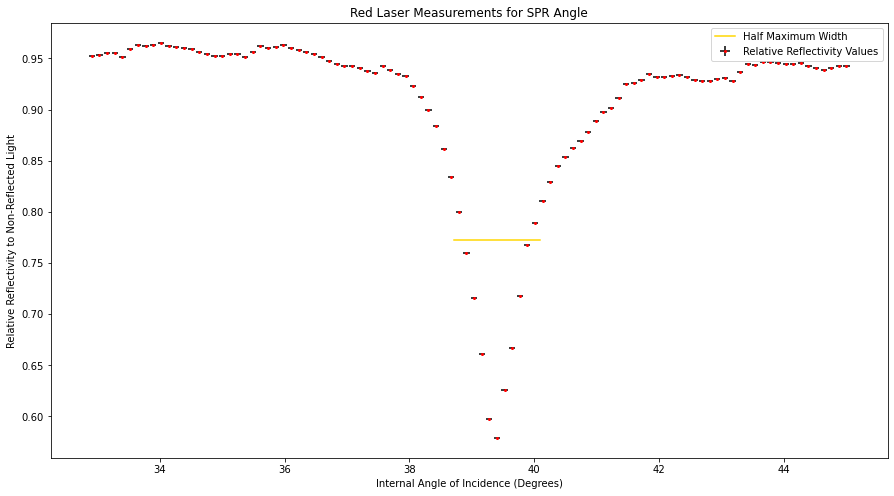

In [15]:
#Red Laser Data Analysis

#Using our built functions above
RedLaserVoltages = np.loadtxt("RedLaser29th.txt")

#Angles
ExternalAnglesForRedLaser = MeasuredAngles(len(RedLaserVoltages), 45, ClockwiseMeasurements)
InternalAnglesForRedLaser = InternalAngles(ExternalAnglesForRedLaser)

#Relative Reflectivity to non reflected Laser
RedLaserRelativeValues = RelativeReflectivity(RedLaserVoltages, "Red")

#Getting the Width of the dip, half maximum so that we can use the shift for other applications
RedHalfMaxWidth = HalfMaximumWidth(InternalAnglesForRedLaser, RedLaserVoltages, "Red")


#Displaying Resonance Angle and Half Maximum Width
print("For Gold film and Red laser we have a resonance angle of ", (ResonanceAngle(RedLaserRelativeValues, InternalAnglesForRedLaser)[0]))
print("The Half Maximum Width is = ", RedHalfMaxWidth[0] - RedHalfMaxWidth[1])

#Errors accounting for fluxations in the background 
RedErrors = (1/(np.sqrt(10)))*RedLaserStandardDeviations*(np.ones(100)) #We take 10 voltages per angle
RedRelativeErrors = RelativeReflectivity(RedErrors, "Red")
print("The Relative Error on the Red Laser Voltages is ", RedRelativeErrors[0]) 

#Minimum Relative Reflectivity
RedMinRelativeReflectivity = (ResonanceAngle(RedLaserRelativeValues, InternalAnglesForRedLaser))[1]
print("The minimum relative reflectivity to a non-reflected red laser is ", RedMinRelativeReflectivity)

#Dielectric Function for gold using red light to calculate
RedDielectricFunction = GoldDielectricFunction(ResonanceAngle(RedLaserRelativeValues, InternalAnglesForRedLaser)[0])
print("The dielectric function for gold at wavelength 632.8nm is ", RedDielectricFunction)

RedDielectricFunctionError = DielectricFunctionError(ResonanceAngle(RedLaserRelativeValues, InternalAnglesForRedLaser)[0],0.05)
print("The calculated error on the dielectric function at 632.8nm is ", RedDielectricFunctionError)

#Just some spacing for neatness
print()
print()

#Plotting
plt.figure(figsize = (15,8))
plt.errorbar(InternalAnglesForRedLaser, RedLaserRelativeValues, RedRelativeErrors, 0.05*(np.ones(100)), 'o', color='Red', ecolor = "black", markersize="2")
#Half Width Plot
plt.plot((RedHalfMaxWidth[0] + 0.2 ,RedHalfMaxWidth[1] - 0.2 ) , (RedHalfMaxWidth[2], RedHalfMaxWidth[2]), color = "Gold")

#Figure Improvements
plt.title("Red Laser Measurements for SPR Angle")
plt.xlabel("Internal Angle of Incidence (Degrees)")
plt.ylabel("Relative Reflectivity to Non-Reflected Light")
plt.legend(["Half Maximum Width", "Relative Reflectivity Values"])




For Gold film and Green laser we have a resonance angle of  [45.72961118]
The Half Maximum Width is =  8.51925806854318
The Relative Error on the Green Laser Reflectivity is  0.0035830206954587415
The minimum relative reflectivity to a non-reflected green laser is  0.23509111161453208
The dielectric function for gold at wavelength 515nm is  [-6.41659802]
The calculated error on the dielectric function at 515nm is  [3.38820383]




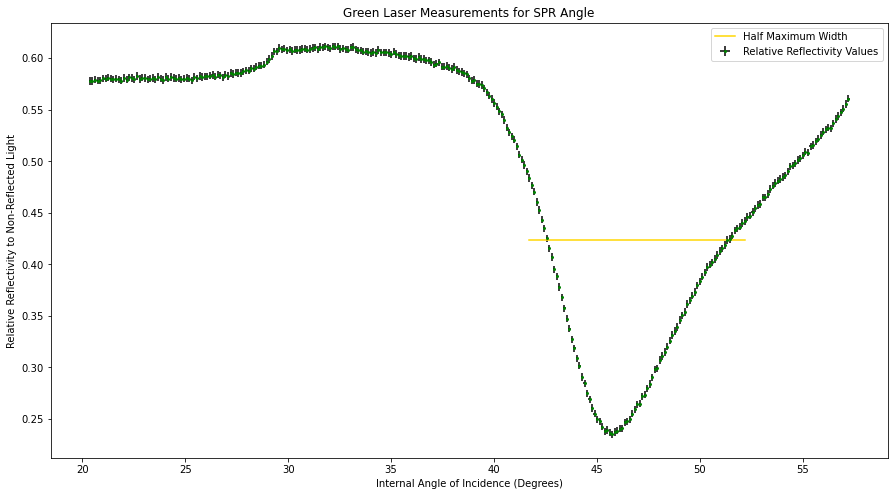

In [14]:
#Green Laser Data Analysis

#Using our built functions above
GreenLaserVoltages = np.loadtxt("GreenLaser29th.txt")
          
#Angles
ExternalAnglesForGreenLaser = MeasuredAngles(len(GreenLaserVoltages), 45 + 8, ClockwiseMeasurements)
InternalAnglesForGreenLaser = InternalAngles(ExternalAnglesForGreenLaser)

#Relative Reflectivity to non reflected laser
GreenLaserRelativeValues = RelativeReflectivity(GreenLaserVoltages, "Green")

#Getting the Width of the dip, half maximum so that we can use the shift for other applications
GreenHalfMaxWidth = HalfMaximumWidth(InternalAnglesForGreenLaser, GreenLaserVoltages, "Green")

print("For Gold film and Green laser we have a resonance angle of ", (ResonanceAngle(GreenLaserRelativeValues, InternalAnglesForGreenLaser))[0])
print("The Half Maximum Width is = ", GreenHalfMaxWidth[0] - GreenHalfMaxWidth[1])

#Errors accounting for fluxations in the background
GreenErrors = (1/(np.sqrt(10)))*GreenLaserStandardDeviations*(np.ones(300)) #We take 10 voltages per angle
GreenRelativeErrors = RelativeReflectivity(GreenErrors, "Green")
print("The Relative Error on the Green Laser Reflectivity is ", GreenRelativeErrors[0]) 

#Minimum Relative Reflectivity
GreenMinRelativeReflectivity = (ResonanceAngle(GreenLaserRelativeValues, InternalAnglesForGreenLaser))[1]
print("The minimum relative reflectivity to a non-reflected green laser is ", GreenMinRelativeReflectivity)

#Dielectric Function for gold using green light to calculate
GreenDielectricFunction = GoldDielectricFunction(ResonanceAngle(GreenLaserRelativeValues, InternalAnglesForGreenLaser)[0])
print("The dielectric function for gold at wavelength 515nm is ", GreenDielectricFunction)

GreenDielectricFunctionError = DielectricFunctionError(ResonanceAngle(GreenLaserRelativeValues, InternalAnglesForGreenLaser)[0],0.05)
print("The calculated error on the dielectric function at 515nm is ", GreenDielectricFunctionError)

#Just some spacing for neatness
print()
print()

#Plotting
plt.figure(figsize = (15,8))
plt.errorbar(InternalAnglesForGreenLaser, GreenLaserRelativeValues, GreenRelativeErrors, 0.05*(np.ones(300)), 'o', color='Green', ecolor = "black", markersize="2")

#Half Width Plot
plt.plot((GreenHalfMaxWidth[0] + 1, GreenHalfMaxWidth[1] -1) , (GreenHalfMaxWidth[2], GreenHalfMaxWidth[2]), color="Gold")

#Making the Graph look better
plt.title("Green Laser Measurements for SPR Angle")
plt.xlabel("Internal Angle of Incidence (Degrees)")
plt.ylabel("Relative Reflectivity to Non-Reflected Light")
plt.legend(["Half Maximum Width","Relative Reflectivity Values"])



For Gold film and Blue laser we have a resonance angle of  [56.35115497]
The Half Maximum Width is =  12.834579234233509
The Relative Error on the Blue Laser Reflectivity is  0.0010099572872245331
The minimum relative reflectivity to a non-reflected blue laser is  0.13383379200165588
The dielectric function for gold at wavelength 450nm is  [-2.66377828]
The calculated error on the dielectric function at 450nm is  [0.29500207]




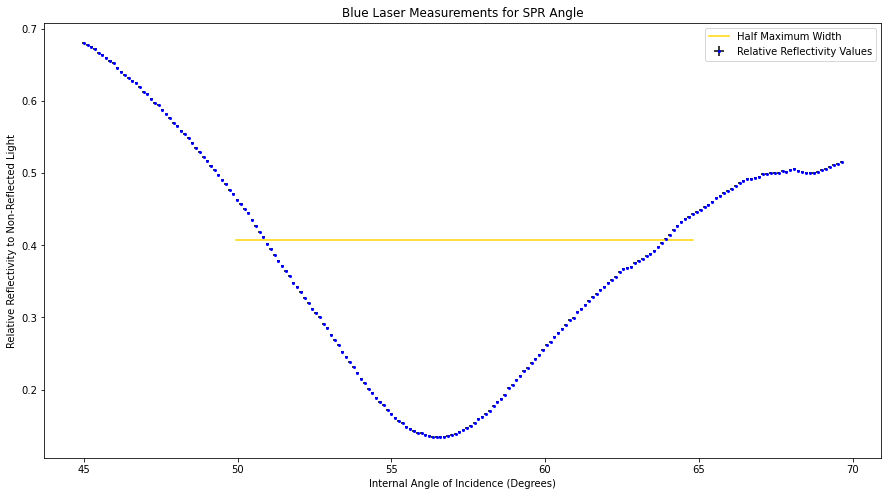

In [13]:
#Blue Laser Data Analysis

#Using our built functions above
BlueLaserVoltages = np.loadtxt("BlueLaser29th.txt")
        
#Angles
ExternalAnglesForBlueLaser = MeasuredAngles(len(BlueLaserVoltages), 45, AntiClockwiseMeasurements)
InternalAnglesForBlueLaser = InternalAngles(ExternalAnglesForBlueLaser)

#Relative Values to the non reflected values
BlueLaserRelativeValues = RelativeReflectivity(BlueLaserVoltages, "Blue")

#Getting the Width of the dip, half maximum so that we can use the shift for other applications
BlueHalfMaxWidth = HalfMaximumWidth(InternalAnglesForBlueLaser, BlueLaserVoltages, "Blue")

#Displaying our important values
print("For Gold film and Blue laser we have a resonance angle of ", (ResonanceAngle(BlueLaserRelativeValues, InternalAnglesForBlueLaser))[0])
print("The Half Maximum Width is = ", BlueHalfMaxWidth[0] - BlueHalfMaxWidth[1])

#Errors accounting for fluxations in the background 
BlueErrors = (1/(np.sqrt(10)))*BlueLaserStandardDeviations*(np.ones(200)) #We take 10 voltages per angle
BlueRelativeErrors = RelativeReflectivity(BlueErrors, "Blue")
print("The Relative Error on the Blue Laser Reflectivity is ", BlueRelativeErrors[0])

#Minimum Relative Reflectivity
BlueMinRelativeReflectivity = (ResonanceAngle(BlueLaserRelativeValues, InternalAnglesForBlueLaser))[1]
print("The minimum relative reflectivity to a non-reflected blue laser is ", BlueMinRelativeReflectivity)

#Dielectric Function for gold using red light to calculate
BlueDielectricFunction = GoldDielectricFunction(ResonanceAngle(BlueLaserRelativeValues, InternalAnglesForBlueLaser)[0])
print("The dielectric function for gold at wavelength 450nm is ", BlueDielectricFunction)

BlueDielectricFunctionError = DielectricFunctionError(ResonanceAngle(BlueLaserRelativeValues, InternalAnglesForBlueLaser)[0],0.05)
print("The calculated error on the dielectric function at 450nm is ", BlueDielectricFunctionError)

#Just some spacing for neatness
print()
print()


#Plotting
plt.figure(figsize = (15,8))
plt.errorbar(InternalAnglesForBlueLaser, BlueLaserRelativeValues, BlueRelativeErrors, 0.05*(np.ones(200)), 'o', color='Blue', ecolor = "black", markersize="2")

#Half Width
plt.plot((BlueHalfMaxWidth[0] + 1, BlueHalfMaxWidth[1] -1) , (BlueHalfMaxWidth[2], BlueHalfMaxWidth[2]), color = "Gold")

#Making the Graph look better
plt.title("Blue Laser Measurements for SPR Angle")
plt.xlabel("Internal Angle of Incidence (Degrees)")
plt.ylabel("Relative Reflectivity to Non-Reflected Light")
plt.legend(["Half Maximum Width","Relative Reflectivity Values"])


Red AoR =  [39.40133974]
Green AoR =  [45.72961118]
Blue AoR =  [56.35115497]


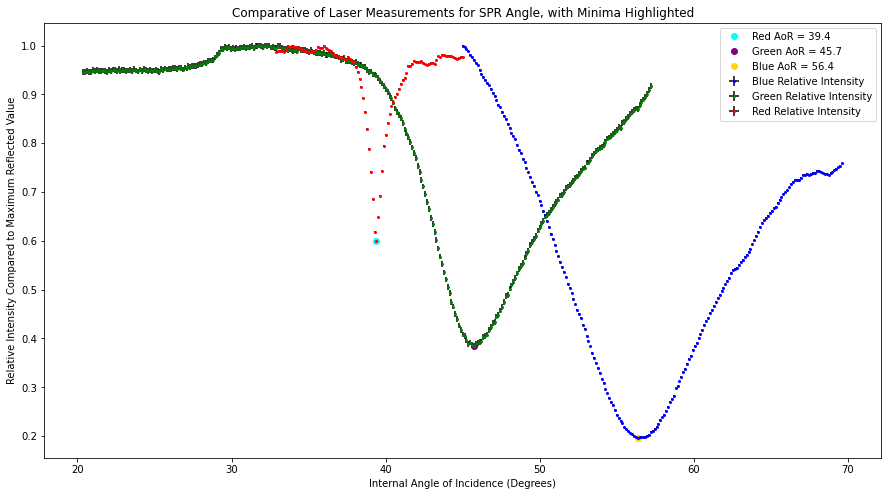

In [12]:
#Cross examining the change in angle of resonance and the relative dip in the reflectivity for all the lasers

plt.figure(figsize = (15,8))

#For Ease of hight dip comparisions to one another
ThreeCompBlueLaserRelativeValues = RelativeReflectivity(BlueLaserVoltages, "Relative To Reflection Max")
ThreeCompGreenLaserRelativeValues = RelativeReflectivity(GreenLaserVoltages, "Relative To Reflection Max")
ThreeCompRedLaserRelativeValues = RelativeReflectivity(RedLaserVoltages, "Relative To Reflection Max")

ThreeCompBlueLaserRelativeErrors = RelativeReflectivity(BlueErrors, "Errors Red")
ThreeCompGreenLaserRelativeErrors = RelativeReflectivity(GreenErrors, "Errors Green")
ThreeCompRedLaserRelativeErrors = RelativeReflectivity(RedErrors, "Errors Blue")



#All Angles of Resonance
RedAoR = (ResonanceAngle(ThreeCompRedLaserRelativeValues, InternalAnglesForRedLaser))[0]
RedMinVoltage = (ResonanceAngle(ThreeCompRedLaserRelativeValues, InternalAnglesForRedLaser))[1]

GreenAoR = (ResonanceAngle(ThreeCompGreenLaserRelativeValues, InternalAnglesForGreenLaser))[0]
GreenMinVoltage = (ResonanceAngle(ThreeCompGreenLaserRelativeValues, InternalAnglesForGreenLaser))[1]

BlueAoR = (ResonanceAngle(ThreeCompBlueLaserRelativeValues, InternalAnglesForBlueLaser))[0]
BlueMinVoltage = (ResonanceAngle(ThreeCompBlueLaserRelativeValues, InternalAnglesForBlueLaser))[1]


#Display of all the resonance angles 
print("Red AoR = ", RedAoR)
print("Green AoR = ", GreenAoR) 
print("Blue AoR = ", BlueAoR)



#Full Data Plots
plt.errorbar(InternalAnglesForBlueLaser, ThreeCompBlueLaserRelativeValues, ThreeCompBlueLaserRelativeErrors, 0.05*(np.ones(200)), 'o', color='Blue', ecolor = "black", markersize="2")
plt.errorbar(InternalAnglesForGreenLaser, ThreeCompGreenLaserRelativeValues, ThreeCompGreenLaserRelativeErrors, 0.05*(np.ones(300)), 'o', color='Green', ecolor = "black", markersize="2")
plt.errorbar(InternalAnglesForRedLaser, ThreeCompRedLaserRelativeValues, ThreeCompRedLaserRelativeErrors, 0.05*(np.ones(100)), 'o', color='Red', ecolor = "black", markersize="2")


#Angles of Resonance Highlighted for each 
plt.plot(RedAoR, RedMinVoltage,'o', color='Cyan')
plt.plot(GreenAoR, GreenMinVoltage,'o', color='Purple')
plt.plot(BlueAoR, BlueMinVoltage,'o', color='Gold')

plt.title("Comparative of Laser Measurements for SPR Angle, with Minima Highlighted")
plt.xlabel("Internal Angle of Incidence (Degrees)")
plt.ylabel("Relative Intensity Compared to Maximum Reflected Value")
plt.legend(["Red AoR = 39.4","Green AoR = 45.7","Blue AoR = 56.4",
            "Blue Relative Intensity","Green Relative Intensity","Red Relative Intensity"])